<a href="https://www.kaggle.com/code/mosesmoncy/concrete-compressive-strength-predictor?scriptVersionId=131742171" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Concrete is a fundamental construction material that provides stability, durability, and strength to structures. One of the critical properties of concrete is its compressive strength, which determines its ability to withstand loads and support the weight of a building. Predicting concrete compressive strength accurately is crucial for ensuring the structural integrity of constructions. With advancements in machine learning and regression models, we can now leverage these technologies to develop reliable predictors for concrete compressive strength. In this blog, we will explore how machine learning and regression models can revolutionize the prediction of concrete compressive strength, offering significant benefits to the construction industry.

Model is created to predict the compressive strenght of the concrete using Regression Analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
a=pd.read_csv('/kaggle/input/concrete-strength-dataset/concrete_data.csv')
a

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
# read first five data

a.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# read last five data

a.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
a.shape

(1030, 9)

In [7]:
a.describe

<bound method NDFrame.describe of       cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0               1040.0            676.0   28   

In [8]:
a.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [9]:
a.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64


<AxesSubplot:>

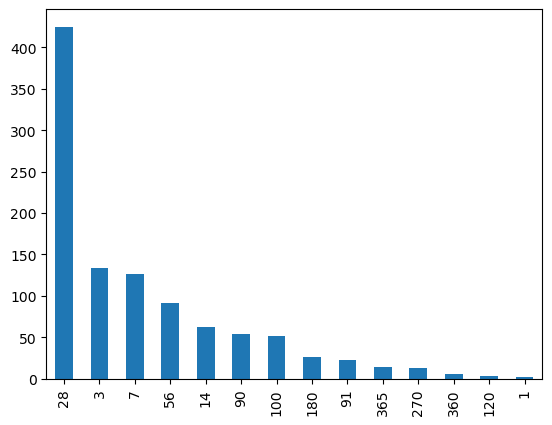

In [10]:
# plot a bar Chart for 'age'

a_age = a['age'].value_counts()
print(a_age)
a['age'].value_counts().plot(kind='bar')

To check outliers

<AxesSubplot:ylabel='concrete_compressive_strength'>

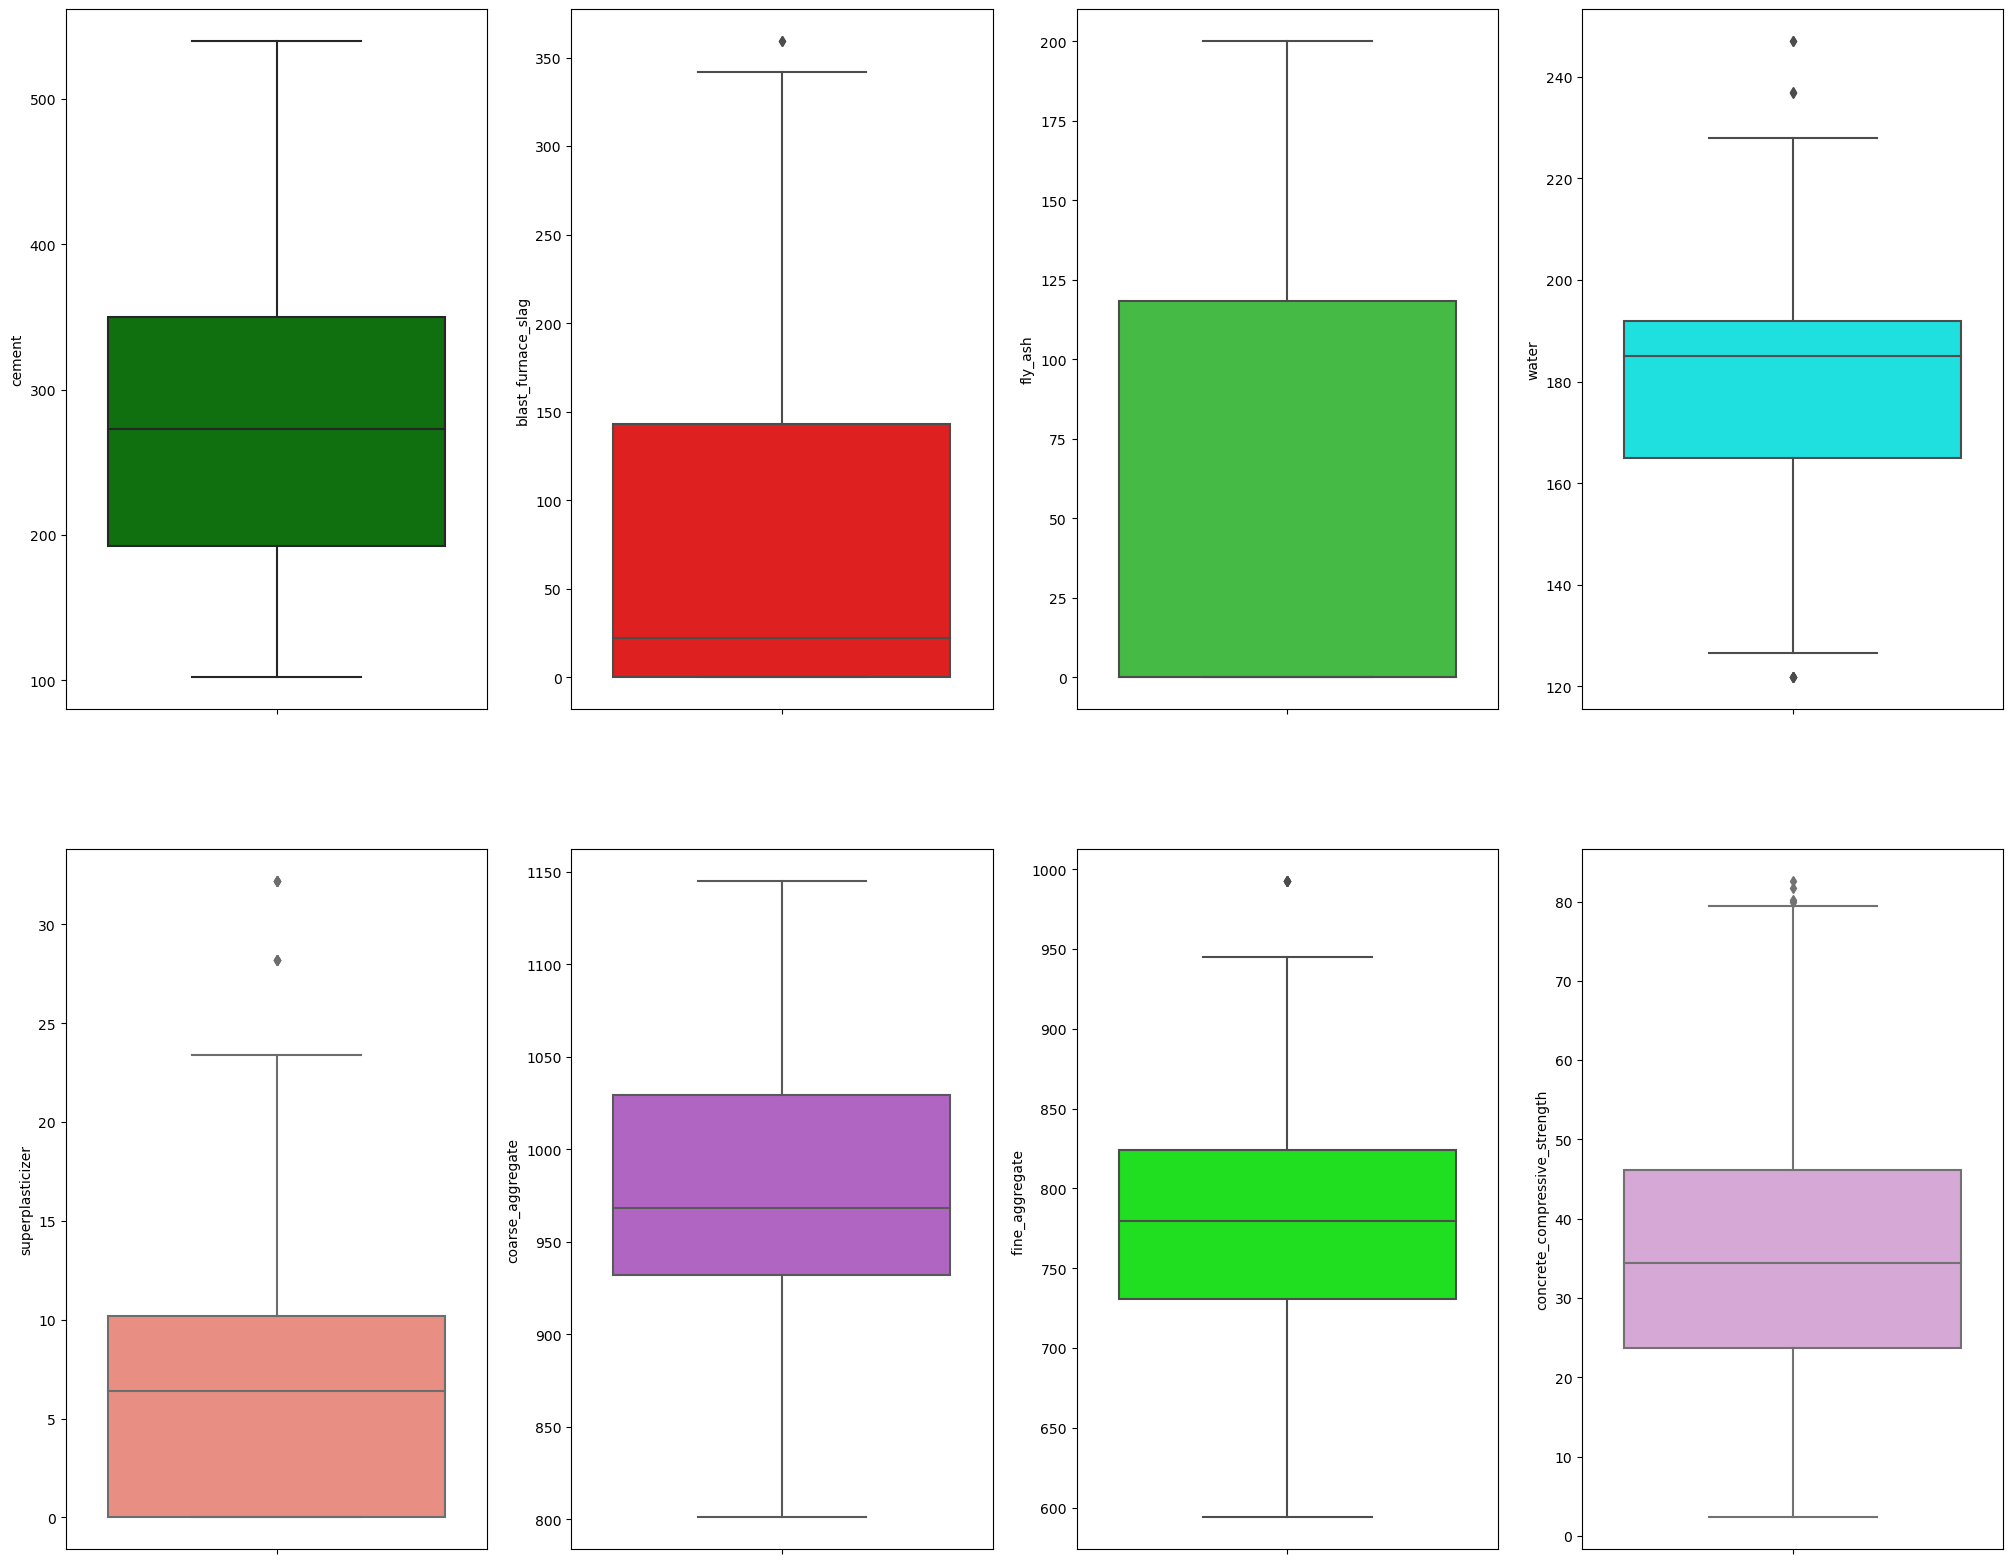

In [11]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (25,20))
sns.boxplot(ax = ax1, y = 'cement', data = a, color = 'green')
sns.boxplot(ax = ax2, y = 'blast_furnace_slag', data = a, color = 'red')
sns.boxplot(ax = ax3, y = 'fly_ash', data = a, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'water', data = a, color = 'cyan')
sns.boxplot(ax = ax5, y = 'superplasticizer', data = a, color = 'salmon')
sns.boxplot(ax = ax6, y = 'coarse_aggregate', data = a, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'fine_aggregate ', data = a, color = 'lime')
sns.boxplot(ax = ax8, y = 'concrete_compressive_strength', data = a, color = 'plum')

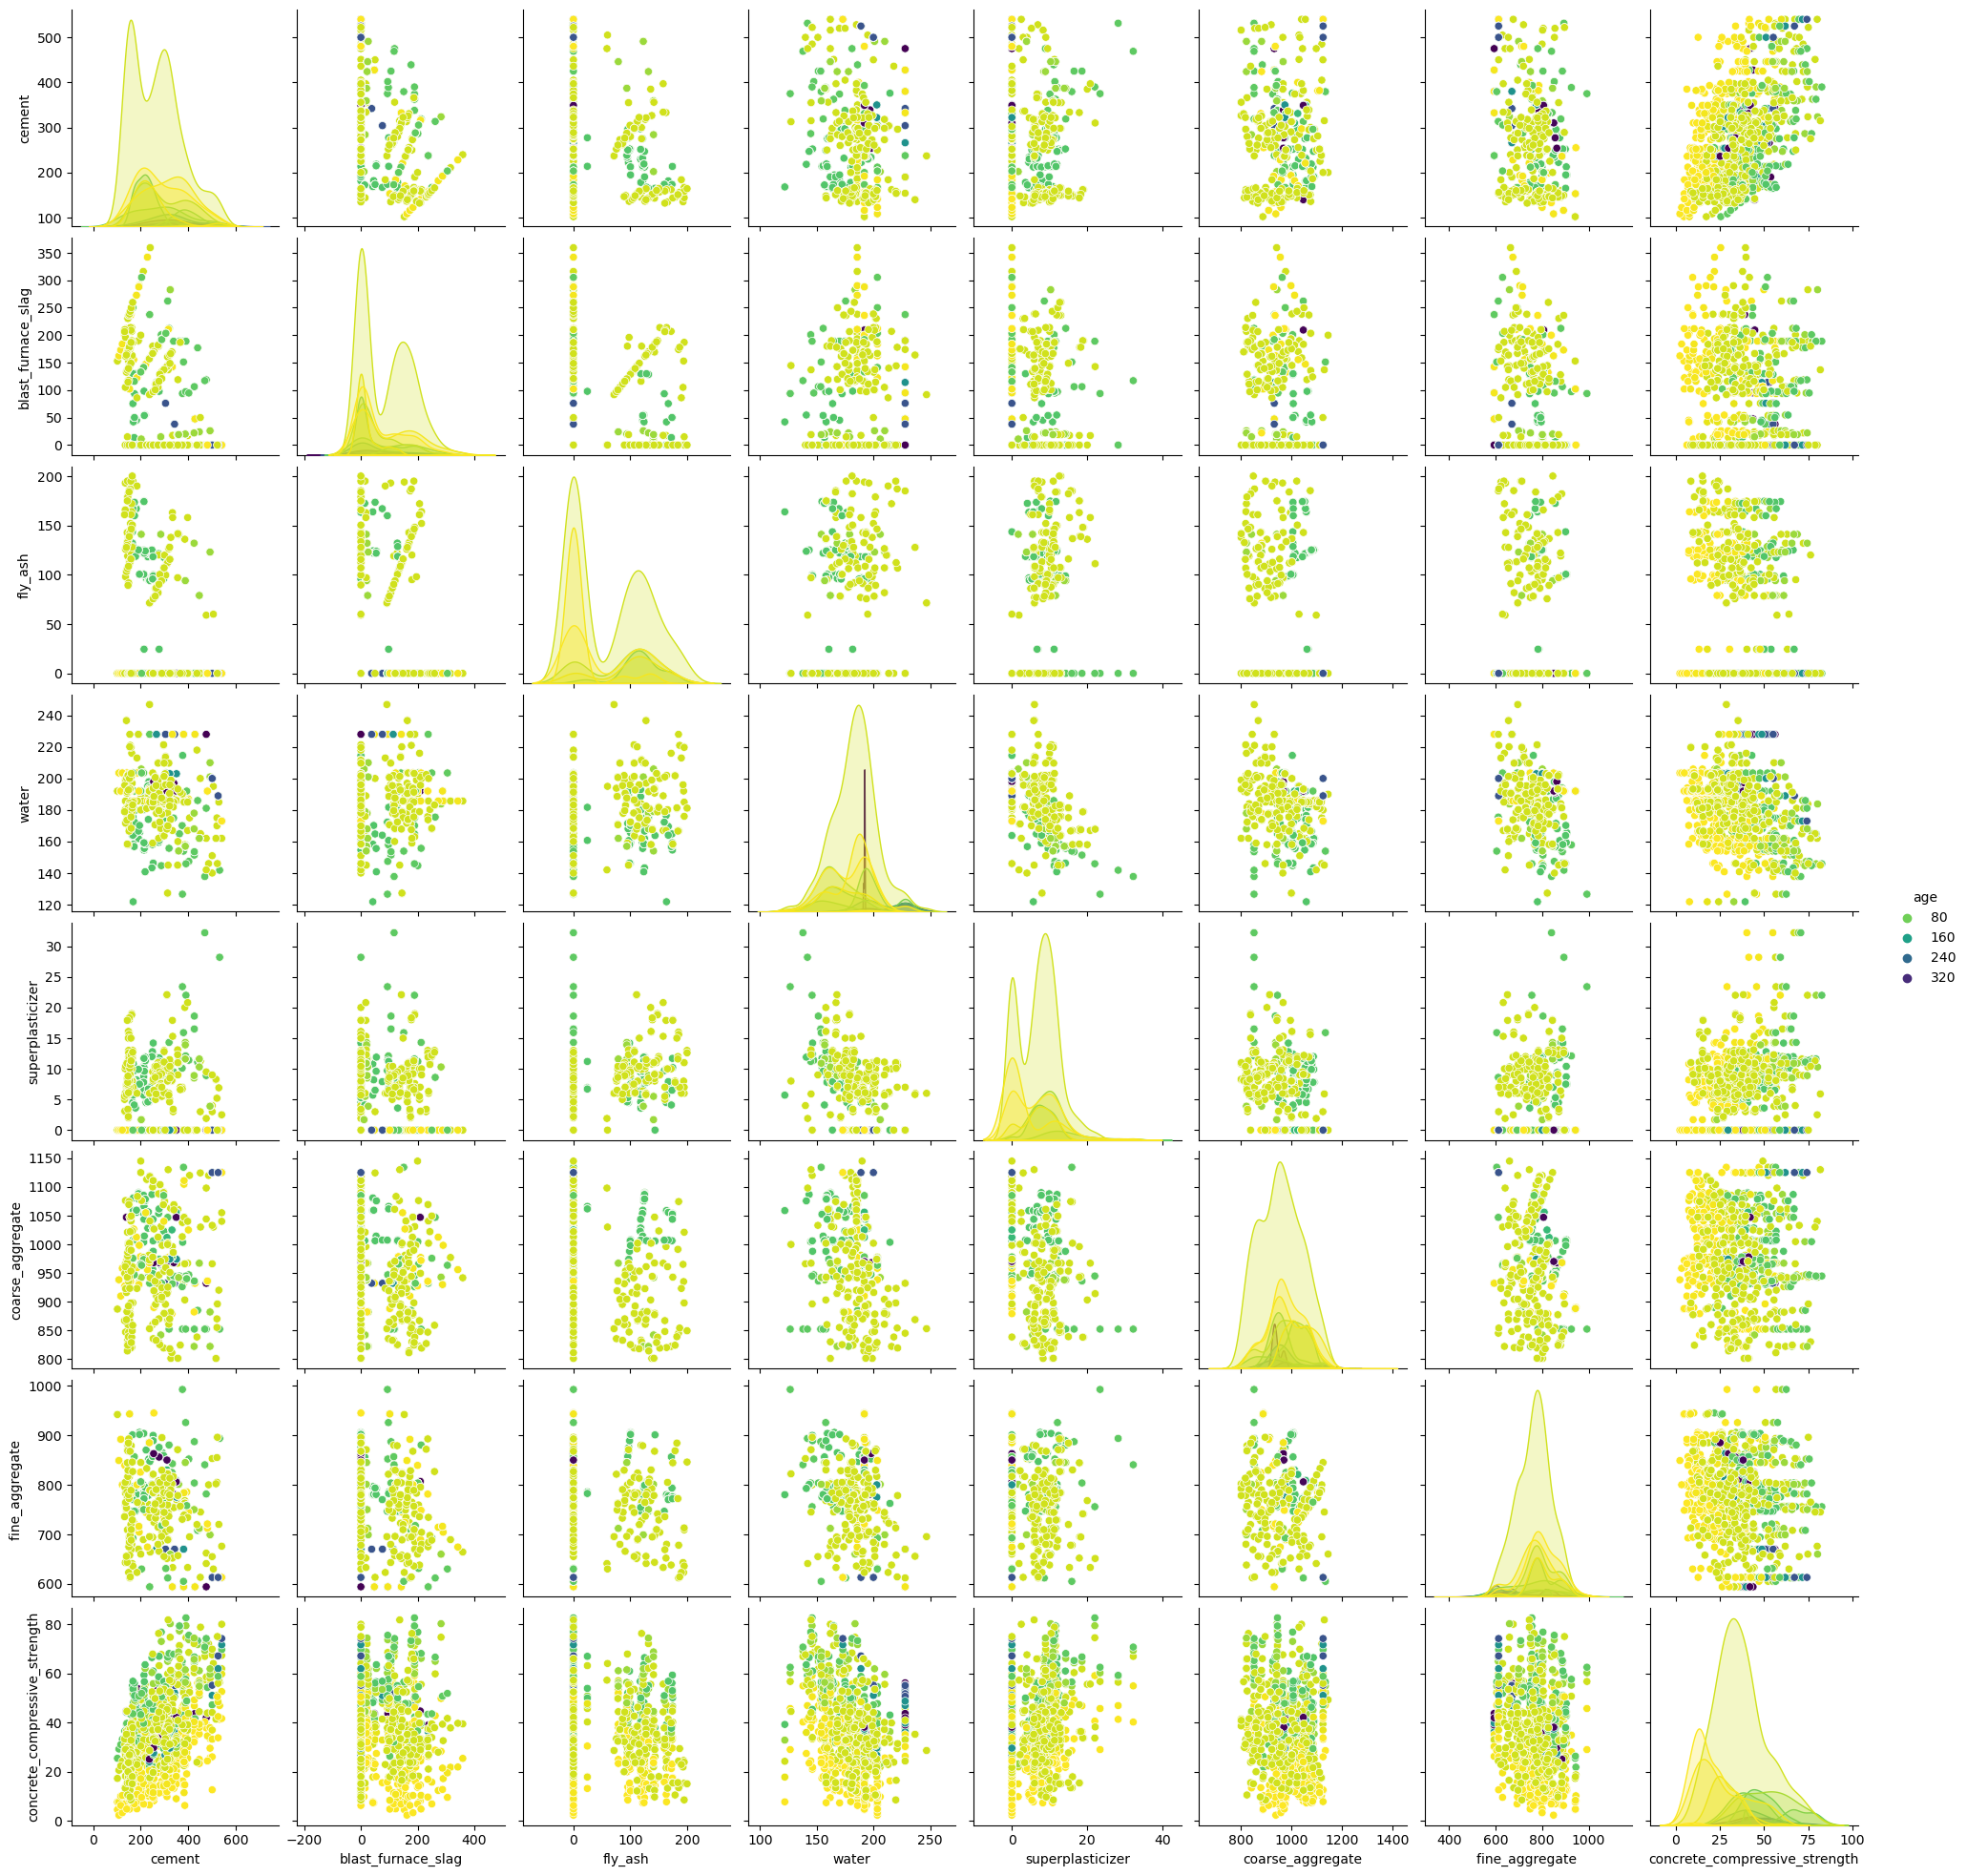

In [12]:
sns.pairplot(a,hue='age',palette='viridis_r')

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='Count'>

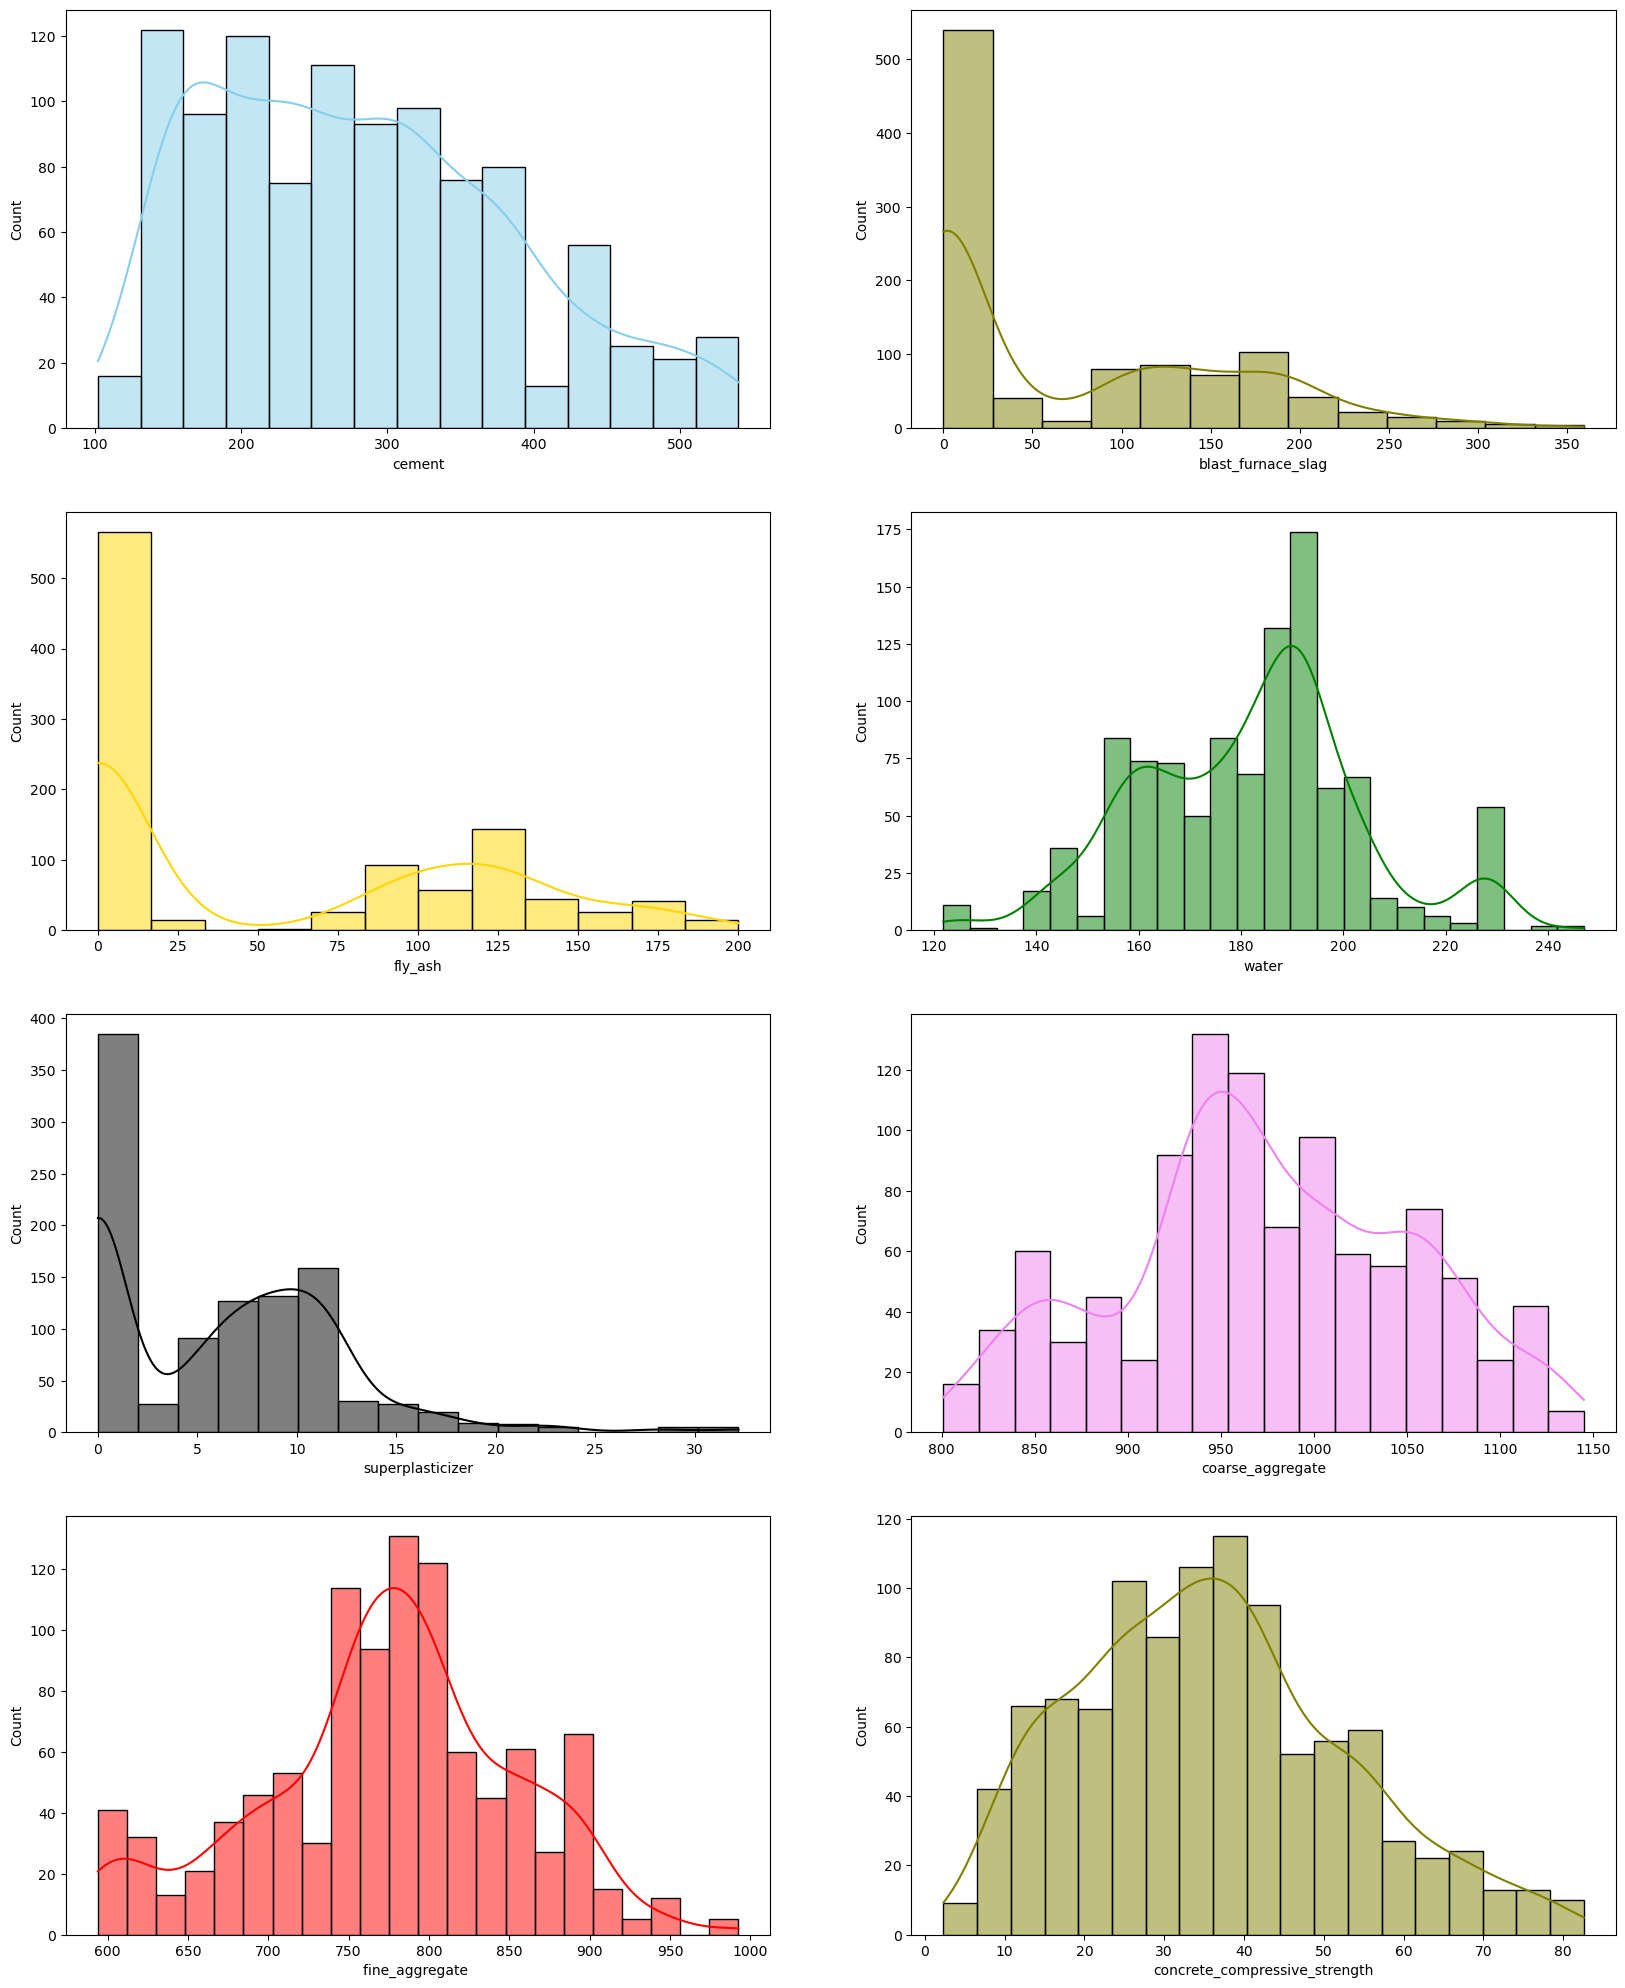

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(20, 25))

sns.histplot(data=a['cement'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['blast_furnace_slag'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['fly_ash'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['water'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a['superplasticizer'], kde=True, color="black", ax=axs[2, 0])
sns.histplot(data=a['coarse_aggregate'], kde=True, color="violet", ax=axs[2, 1])
sns.histplot(data=a['fine_aggregate '], kde=True, color="red", ax=axs[3, 0])
sns.histplot(data=a['concrete_compressive_strength'], kde=True, color="olive", ax=axs[3, 1])

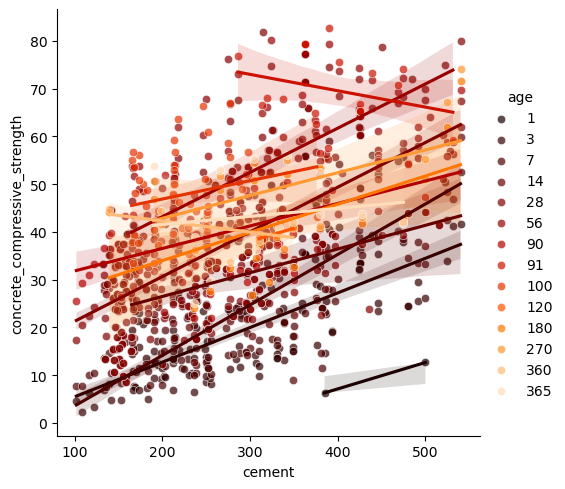

In [14]:
sns.lmplot(x = 'cement', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

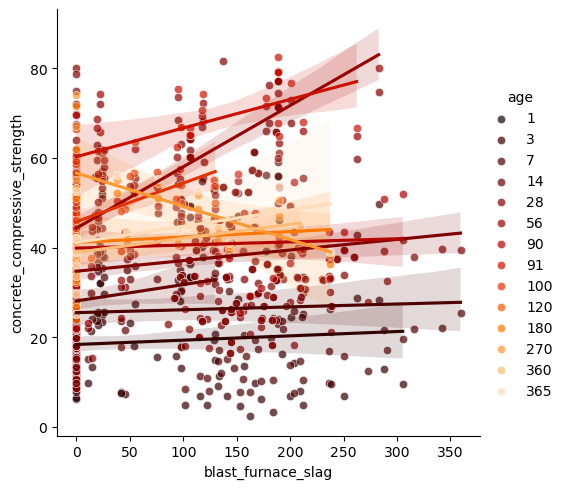

In [15]:
sns.lmplot(x = 'blast_furnace_slag', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

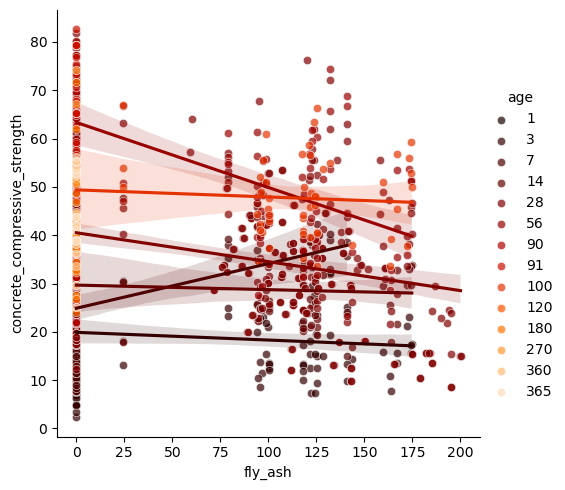

In [16]:
sns.lmplot(x = 'fly_ash', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

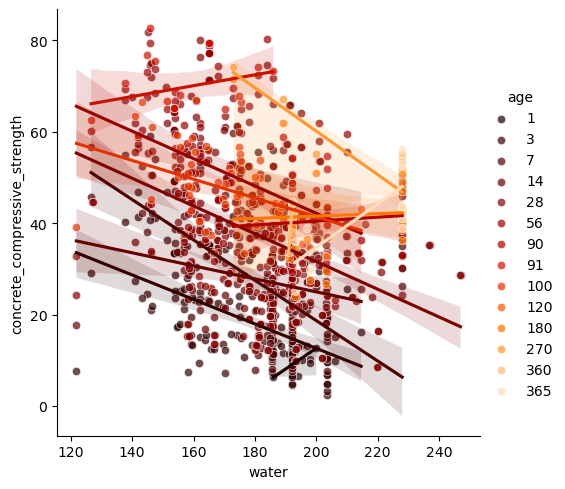

In [17]:
sns.lmplot(x = 'water', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

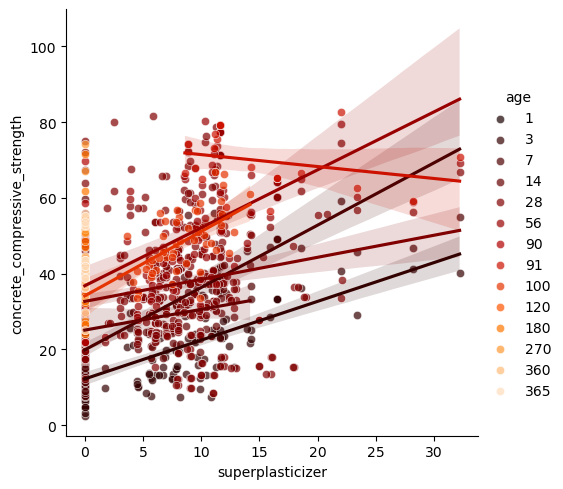

In [18]:
sns.lmplot(x = 'superplasticizer', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

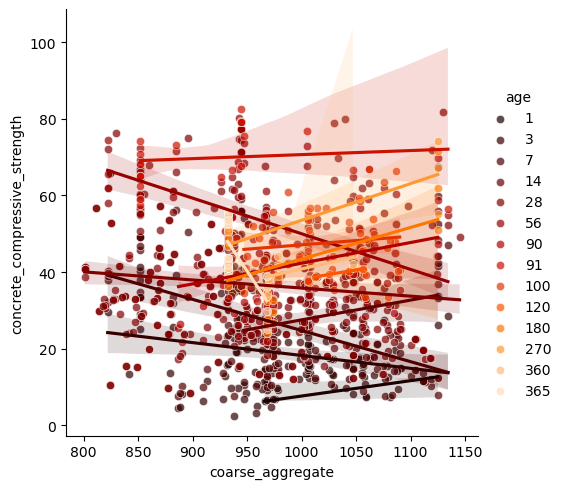

In [19]:
sns.lmplot(x = 'coarse_aggregate', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

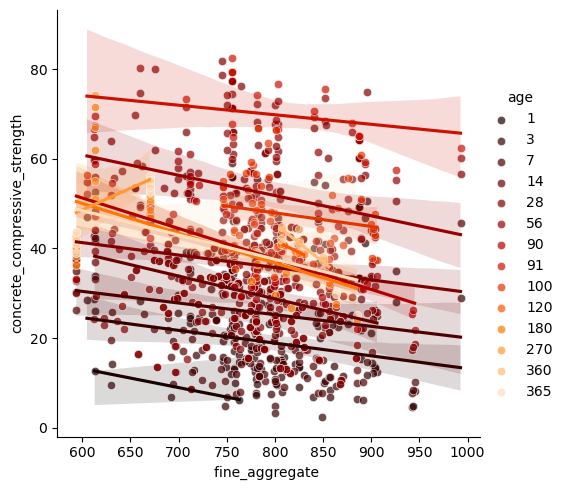

In [20]:
sns.lmplot(x = 'fine_aggregate ', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

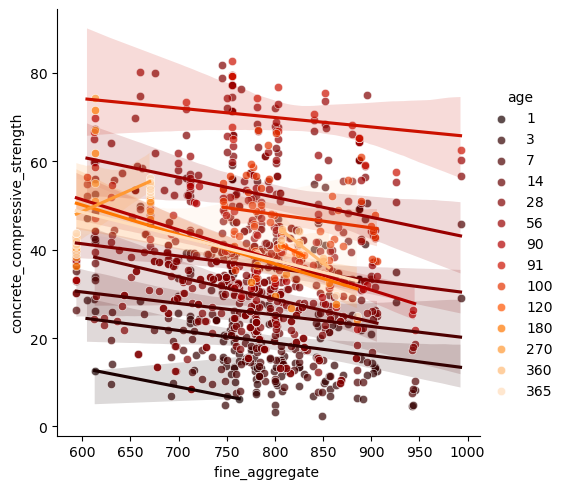

In [21]:
sns.lmplot(x = 'fine_aggregate ', y = 'concrete_compressive_strength', data = a, hue = 'age', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

<AxesSubplot:>

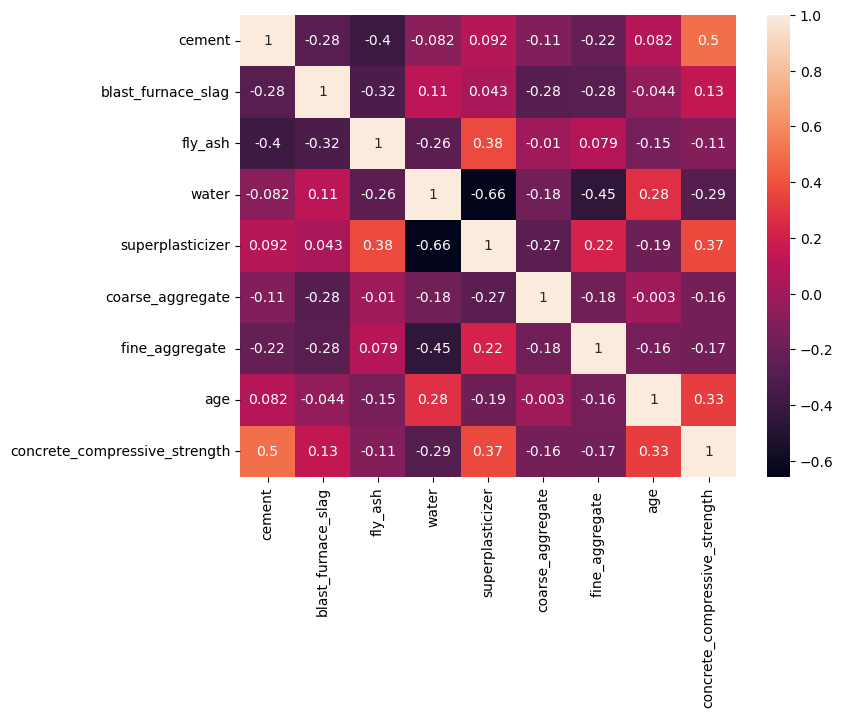

In [22]:
plt.figure(figsize = (8,6))
corr = a.corr()
sns.heatmap(corr, annot = True)

In [23]:
a.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [24]:
# splitting x(inputs) and y(outputs)

x=a.drop(['concrete_compressive_strength'],axis=1)
y=a['concrete_compressive_strength']
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [25]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [26]:
# Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [27]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
134,361.816242,187.551020,0.846719,165.641316,10.692471,945.076773,756.073079,28.289117
13,190.860836,188.538805,0.846719,225.804446,1.050073,932.540118,671.300486,89.337579
996,153.817197,236.643937,0.846719,199.107653,6.286893,1001.442362,685.034041,28.289117
770,348.345827,0.859643,0.846719,191.479997,1.050073,1046.061007,805.671962,3.672802
937,312.985990,0.859643,112.093812,178.608329,7.700003,1001.541076,689.776564,28.289117
...,...,...,...,...,...,...,...,...
702,200.765553,132.235056,0.846719,191.479997,1.050073,965.510533,805.869568,7.611412
378,375.088562,0.859643,0.846719,213.028123,1.050073,1003.120497,762.594048,99.184105
1000,143.219150,165.424634,128.534754,173.841045,10.110602,883.775492,785.219833,28.289117
664,250.487229,165.622191,0.846719,202.444752,1.050073,977.553618,695.111902,7.611412


In [28]:
x_train

array([[-0.85878488,  2.41583298, -0.84735402, ..., -0.5490306 ,
        -0.70436944, -0.67726739],
       [-0.64965429,  0.25790419, -0.46304258, ...,  1.20392371,
         0.17916299,  0.17417421],
       [ 0.27320643, -0.85685524, -0.84735402, ...,  0.5089198 ,
         0.74569315,  1.2023301 ],
       ...,
       [ 1.03969886,  1.29084641, -0.84735402, ..., -0.357261  ,
        -0.19894815, -0.61300765],
       [ 1.37641831,  0.35108489, -0.84735402, ..., -0.46923385,
         0.41086746, -0.61300765],
       [ 0.77780595,  1.29084641, -0.84735402, ..., -0.357261  ,
        -0.19894815, -0.61300765]])

In [29]:
x_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28
...,...,...,...,...,...,...,...,...
702,200.0,133.0,0.0,192.0,0.0,965.4,806.2,7
378,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,100
1000,141.9,166.6,129.7,173.5,10.9,882.6,785.3,28
664,250.2,166.8,0.0,203.5,0.0,977.6,694.1,7


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [31]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_lr=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_lr)
mean_absolute_percentage_error_lr=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_lr)

Mean Absolute Error is 7201.4476094254005
Mean Absolute Percentage Error is 255.10408081040808
Mean Squared Error is 53172708.976804286
Root Mean Square Error is 7291.961942907017
r2_score is  -201525.36795375322
Mean Absolute Percentage Error is 255.10408081040808


In [32]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_tree=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_tree)
mean_absolute_percentage_error_tree=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_tree)

Mean Absolute Error is 31.69559870550162
Mean Squared Error is 1244.3707132686081
Root Mean Square Error is 35.27563909085997
r2_score is  -3.7162071494690947
Mean Absolute Percentage Error is 1.5213757959038507


In [33]:
# Creating Random Forest Regression 

forest=RandomForestRegressor()
forest.fit(x_train,y_train)

y_pred=forest.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_forest=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_forest)
mean_absolute_percentage_error_forest=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_forest)

Mean Absolute Error is 25.79322664509172
Mean Squared Error is 854.6874411778224
Root Mean Square Error is 29.235037902794353
r2_score is  -2.2392943498777047
Mean Absolute Percentage Error is 1.274751706248277


In [34]:
x = ['Decision Tree','Random Forest']
y1 = [mean_absolute_percentage_error_tree,mean_absolute_percentage_error_forest]
y2 = [r2_score_tree,r2_score_forest]

trace1 = go.Bar(x = x, y = y1, name = 'Mean Absolute Percentage Error', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Coefficient of determination', marker = dict(color = 'violet'))

data = [trace1,trace2]
layout = go.Layout(title = 'Performance Evaluation ', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)